In [1]:
import os

os.chdir('..')

In [2]:
from tensorflow import keras

2022-04-08 13:20:48.607285: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-08 13:20:48.607309: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import tensorflow as tf
from keras import backend as K
from reinforce import Reinforcement
from keras.models import Sequential
from model import Model 
from prediction import Predictor
from predictSMILES import *
from utils import *
import numpy as np

2022-04-08 13:20:50.452917: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-08 13:20:50.453877: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-08 13:20:50.453890: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-08 13:20:50.453906: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (seriema): /proc/driver/nvidia/version does not exist


In [13]:
config_file = '/home/joao/documentos/DiverseDRL/configReinforce.json' # Configuration file
property_identifier = 'qed' # It can be 'a2d', kor', 'qed', 'sas', 'logP', or 'jak2'
#'a2d' (checked), kor (checked), 'qed', 'sas', 'logP', or 'jak2'
os.environ["CUDA_VISIBLE_DEVICES"]="0"
#sets environment variables in the notebook
session = tf.compat.v1.Session()
#encapsulates the environment in which Operation objects
#are executed, and Tensor objects are evaluated
K.set_session(session)
#sets the session on

#Por que precisa inicializar uma sessão?

In [14]:
# load configuration file
configReinforce,exp_time=load_config('/home/joao/documentos/DiverseDRL/configReinforce.json')

main.py -function- load_config


In [15]:
# Load generator object
generator_model = Sequential() #creates a model of plain stack of layers
#where each layer has exactly one input tensor and one output tensor.
generator_model = Model(configReinforce)
#groups layers into an object with training and inference features.
generator_model.model.load_weights("/home/joao/documentos/DiverseDRL/generator_model/LSTM_2layer_adam_d3.hdf5")

In [16]:
configReinforce.keys()

dict_keys(['exp_name', 'file_path_logP', 'file_path_jak2', 'file_path_a2d', 'file_path_kor', 'file_path_generated', 'output', 'paddSize', 'data_length', 'units', 'num_epochs', 'optimizer', 'seed', 'batch_size', 'validation_split', 'verbose_training', 'dropout', 'learning_rate', 'finetune_sample_num', 'model_name_unbiased', 'model_name_biased', 'n_iterations', 'n_to_generate', 'n_policy', 'threshold_set', 'n_to_draw', 'evaluateSmiles'])

In [17]:
# Initialize lists to evaluate the model
difs = [] # List with the differences between the averages
#of the desired property distributions (G_0 and G_optimized)
divs = [] # List with the internal diversities of the G_optimized generated molecules 
perc_valid = [] # List with the % of valid SMILES generated by G_optimized
    
# To compute SA score or qed it's not necessary to have a Predictor model
if property_identifier != 'sas' and property_identifier != 'qed':
    # Load the Predictor object
    predictor = Predictor(configReinforce,property_identifier)
else:
    predictor = None

In [18]:
for k,v in configReinforce.items():
    print(f'{k}:{v}')

exp_name:Model
file_path_logP:data/logP_labels.csv
file_path_jak2:data/jak2_data.csv
file_path_a2d:data/data_clean_a2d.csv
file_path_kor:data/data_clean_kop.csv
file_path_generated:data/generated
output:createdSMILES/newSmiles_
paddSize:65
data_length:0
units:256
num_epochs:16
optimizer:adam
seed:56
batch_size:10
validation_split:0.1
verbose_training:True
dropout:0.3
learning_rate:0.001
finetune_sample_num:10
model_name_unbiased:generator_model\LSTM_2layer_adam_d3.hdf5
model_name_biased:generator_model\LSTM_2layer_adam_d3_updated
n_iterations:75
n_to_generate:100
n_policy:7
threshold_set:2
n_to_draw:2
evaluateSmiles:True


In [19]:
configReinforce['model_name_unbiased'] = 'generator_model/LSTM_2layer_adam_d3.hdf5'
configReinforce['model_name_biased'] = 'generator_model/LSTM_2layer_adam_d3_updated'
# Create Reinforcement Learning object
RL_obj = Reinforcement(generator_model, predictor,configReinforce,property_identifier)
#configReinforce - parameters to use in the predictive model and get_reward function
#property_identifier - It indicates what property we want to optimize
#must change both to adapt the model?

....................................
updated model load_weights is DONE!


Generating molecules...: 100%|██████████| 100/100 [01:34<00:00,  1.05it/s]
RDKit ERROR: [14:14:26] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [14:14:26] SMILES Parse Error: unclosed ring for input: 'Cc1ccccc1CNCCCN(c2ccccn2)CC1'
[14:14:26] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18 19 20

RDKit ERROR: [14:14:26] Can't kekulize mol.  Unkekulized atoms: 2 3 12 13 14
[14:14:26] SMILES Parse Error: unclosed ring for input: 'Cc1ccccc1CNCCCN(c2ccccn2)CC1'
[14:14:26] Can't kekulize mol.  Unkekulized atoms: 2 3 12 13 14

RDKit ERROR: 
RDKit ERROR: [14:14:26] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16
RDKit ERROR: 
[14:14:26] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16



Proportion of valid SMILES: 0.96
Max QED:  0.8615493546277326
Mean QED:  0.8289466696287651
Min QED:  0.5297256591150028


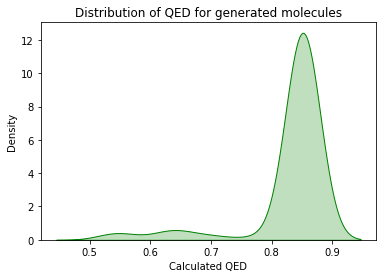

In [20]:
    # SMILES generation with unbiased Generator 
#    smiles_original, prediction_original,valid,unique,div = RL_obj.test_generator(configReinforce.n_to_generate,0,True)
    
#      Training Generator with RL    
#    RL_obj.policy_gradient()
    
# SMILES generation after 85 training iterations 
smiles_iteration85,prediction_iteration85,valid,unique,div,perc_desirable = RL_obj.test_generator(configReinforce.n_to_generate,85, False)

BIASED GENERATION: 0

 --------- Original model LOADED! ---------


Generating molecules...: 100%|██████████| 100/100 [02:16<00:00,  1.36s/it]

Proportion of valid SMILES: 0.99
Max QED:  0.9421492135839376
Mean QED:  0.6616438576705056
Min QED:  0.12278999845344646



RDKit ERROR: [14:32:18] SMILES Parse Error: unclosed ring for input: 'CC1CCC2C(C(=O)N2c3ccc(C#N)cc32)CC1c1ccc(O)cc1'
[14:32:18] SMILES Parse Error: unclosed ring for input: 'CC1CCC2C(C(=O)N2c3ccc(C#N)cc32)CC1c1ccc(O)cc1'
RDKit ERROR: [14:32:18] Explicit valence for atom # 3 C, 5, is greater than permitted
[14:32:18] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:32:18] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 26
RDKit ERROR: 
[14:32:18] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 26



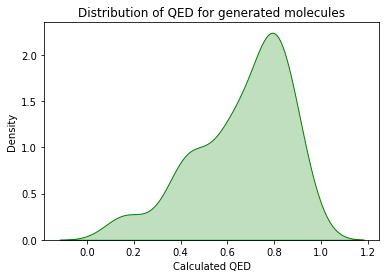


 --------- Updated model LOADED! ---------


Generating molecules...: 100%|██████████| 100/100 [01:54<00:00,  1.14s/it]

Proportion of valid SMILES (UNB,B): 0.99 0.97
Max of QED: (UNB,B) 0.9421492135839376 0.9158202796931024
Mean of QED: (UNB,B) 0.6616438576705056 0.7448403939865146
Min of QED: (UNB,B) 0.12278999845344646 0.33942358984550913



RDKit ERROR: [14:34:12] SMILES Parse Error: extra close parentheses while parsing: Cc1ccccc1CN1CC2CNc2ccccc3C2)CC1
[14:34:12] SMILES Parse Error: extra close parentheses while parsing: Cc1ccccc1CN1CC2CNc2ccccc3C2)CC1
RDKit ERROR: [14:34:12] SMILES Parse Error: Failed parsing SMILES 'Cc1ccccc1CN1CC2CNc2ccccc3C2)CC1' for input: 'Cc1ccccc1CN1CC2CNc2ccccc3C2)CC1'
RDKit ERROR: [14:34:12] SMILES Parse Error: extra close parentheses while parsing: CC1=CCCN2CCc3ccccc32)C1
RDKit ERROR: [14:34:12] SMILES Parse Error: Failed parsing SMILES 'CC1=CCCN2CCc3ccccc32)C1' for input: 'CC1=CCCN2CCc3ccccc32)C1'
RDKit ERROR: [14:34:12] SMILES Parse Error: extra close parentheses while parsing: Cc1ccccc1CN1CCc2ccncc2)CC1
RDKit ERROR: [14:34:12] SMILES Parse Error: Failed parsing SMILES 'Cc1ccccc1CN1CCc2ccncc2)CC1' for input: 'Cc1ccccc1CN1CCc2ccncc2)CC1'
[14:34:12] SMILES Parse Error: Failed parsing SMILES 'Cc1ccccc1CN1CC2CNc2ccccc3C2)CC1' for input: 'Cc1ccccc1CN1CC2CNc2ccccc3C2)CC1'
[14:34:12] SMILES Parse 

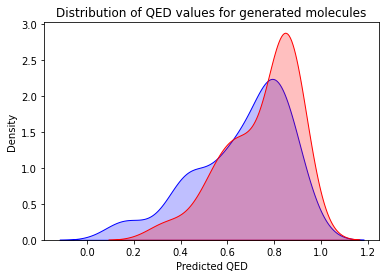

BIASED GENERATION: 1

 --------- Original model LOADED! ---------


Generating molecules...: 100%|██████████| 100/100 [02:13<00:00,  1.34s/it]
RDKit ERROR: [14:36:26] SMILES Parse Error: unclosed ring for input: 'c1ccc(OCCCSc2nc3c(cn2)cc1-c2ccc(Cl)cc2C(=O)N3)cn1'
RDKit ERROR: [14:36:26] SMILES Parse Error: unclosed ring for input: 'Nc1nc(Cn2cnc(C(F)(F)F)n2)cn2cc3c(CCCC(=O)NCCN4CCCCC4)nc3ccccc3c12'
[14:36:26] SMILES Parse Error: unclosed ring for input: 'c1ccc(OCCCSc2nc3c(cn2)cc1-c2ccc(Cl)cc2C(=O)N3)cn1'
RDKit ERROR: [14:36:26] SMILES Parse Error: extra close parentheses while parsing: O=C1c2cccc3c2OCCO3C)N1CC1CCC1
[14:36:26] SMILES Parse Error: unclosed ring for input: 'Nc1nc(Cn2cnc(C(F)(F)F)n2)cn2cc3c(CCCC(=O)NCCN4CCCCC4)nc3ccccc3c12'
[14:36:26] SMILES Parse Error: extra close parentheses while parsing: O=C1c2cccc3c2OCCO3C)N1CC1CCC1
RDKit ERROR: [14:36:26] SMILES Parse Error: Failed parsing SMILES 'O=C1c2cccc3c2OCCO3C)N1CC1CCC1' for input: 'O=C1c2cccc3c2OCCO3C)N1CC1CCC1'
RDKit ERROR: [14:36:26] Explicit valence for atom # 7 O, 3, is greater than permi

Proportion of valid SMILES: 0.97
Max QED:  0.9289317879429615
Mean QED:  0.6735358956046984
Min QED:  0.14205890913285715


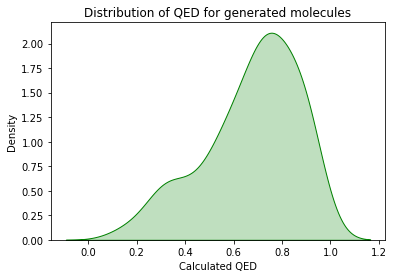


 --------- Updated model LOADED! ---------


Generating molecules...:  30%|███       | 30/100 [00:28<01:06,  1.06it/s]


KeyboardInterrupt: 

In [21]:
# To directly compare the original and biased models several times, evaluating
# prediction differences, diversity, and validity
for k in range(20):
    print("BIASED GENERATION: " + str(k))
    dif,div,valid,perc_uniq,perc_desirable = RL_obj.compare_models(configReinforce.n_to_generate,True)
    difs.append(dif)
    divs.append(div)
    perc_valid.append(valid)
print("Mean value difference: " + str(np.mean(difs)))
print("Mean value diversity: " + str(np.mean(divs)))
print("Mean value validity: " + str(np.mean(perc_valid)))